# Usage of Gesis Notebooks

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import math
import pandas as pd
import requests
import time

In [2]:
from_dt = datetime.datetime(2017,10,1).isoformat()
to_dt = datetime.datetime(2020,9,30).isoformat()
url = f'https://notebooks.gesis.org/gallery/api/v1.0/launches/{from_dt}/{to_dt}'

In [4]:
launches = []
# because of pagination the api gives 100 results per page so for analysis you have to take data in all pages
next_page = 1
start = datetime.datetime.now()
while next_page is not None:
    params = {'origin': 'notebooks.gesis.org',
             'page': next_page}
    r = requests.get(url, params=params)
    response = r.json()
    # check the limit of queries per second/minute,
    message = response.get("message", "")
    if message not in ["2 per 1 second", "100 per 1 minute"]:
        launches.extend(response['launches'])
        if next_page % 10 == 0:
            timesnap = datetime.datetime.now() - start
            print(f"finished page {next_page}. Loop going for {math.floor(timesnap.seconds / 3600)}:{math.floor(timesnap.seconds % 3600 / 60)}:{timesnap.seconds % 3600 % 60}. Average time per page: {round(timesnap.seconds,3) / next_page} seconds")
        next_page = response['next_page']

    else:
        time.sleep(1)

finished page 10. Loop going for 0:0:10. Average time per page: 1.0 seconds
finished page 20. Loop going for 0:0:19. Average time per page: 0.95 seconds
finished page 30. Loop going for 0:0:28. Average time per page: 0.9333333333333333 seconds
finished page 40. Loop going for 0:0:38. Average time per page: 0.95 seconds
finished page 50. Loop going for 0:0:47. Average time per page: 0.94 seconds
finished page 60. Loop going for 0:0:56. Average time per page: 0.9333333333333333 seconds
finished page 70. Loop going for 0:1:7. Average time per page: 0.9571428571428572 seconds
finished page 80. Loop going for 0:1:17. Average time per page: 0.9625 seconds
finished page 90. Loop going for 0:1:26. Average time per page: 0.9555555555555556 seconds
finished page 100. Loop going for 0:1:37. Average time per page: 0.97 seconds
finished page 110. Loop going for 0:1:47. Average time per page: 0.9727272727272728 seconds
finished page 120. Loop going for 0:1:57. Average time per page: 0.975 seconds
fi

In [5]:
data = pd.DataFrame.from_dict(launches)
data.to_csv("launches_data.csv")
data.index

AttributeError: 'RangeIndex' object has no attribute 'head'

In [10]:
data = pd.read_csv("launches_data.csv")

RangeIndex(start=0, stop=681957, step=1)

In [48]:
totals_per_repo = (data.groupby(["spec"])
 .size()
 .reset_index(name='repo_counts')
                   .sort_values(by='repo_counts', ascending=False))
top10 = totals_per_repo.head(10)["spec"]
data_others = data
data_others.loc[~data_others['spec'].isin(list(top10)), 'spec']  = 'others'
totals_per_repo = (data_others.groupby(["spec"])
 .size()
 .reset_index(name='repo_counts')
                   .sort_values(by='repo_counts', ascending=False))

others_row = totals_per_repo.loc[totals_per_repo["spec"] == "others"]
totals_per_repo = totals_per_repo.loc[totals_per_repo["spec"] != "others"]
totals_per_repo = pd.concat([totals_per_repo, others_row])
totals_per_repo

,spec,repo_counts
6,ipython/ipython-in-depth/master,399876
4,binder-examples/requirements/master,32092
0,DS-100/textbook/master,31753
3,Petlja/AnalizaPodatakaGim2/master,16292
10,scikit-learn/scikit-learn/0.22.X,8252
5,ipython/ipython-in-depth/7e5ce96cc9251083979ef...,7029
1,ELC/380e584b87227b15727ec886223d9d4a/master,6102
7,jupyterlab/jupyterlab-demo/try.jupyter.org,5696
9,rasahq/docs-binder/master,5297
2,ELC/8fdc0f490b3058872a7014f01416dfb6/master,4412


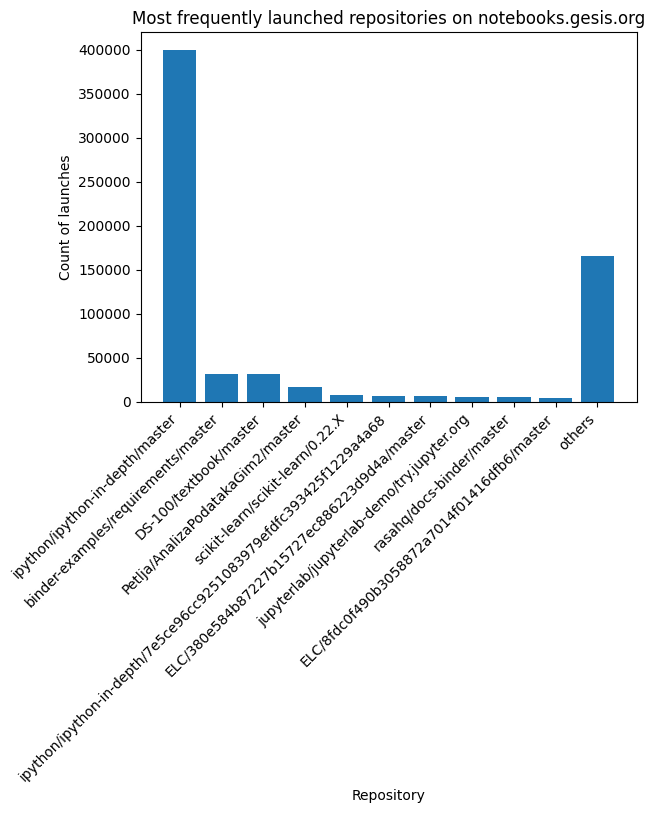

In [49]:
plt.bar(totals_per_repo["spec"],totals_per_repo["repo_counts"])
plt.title("Most frequently launched repositories on notebooks.gesis.org")
plt.ylabel("Count of launches")
plt.xlabel("Repository")
plt.xticks(rotation=45, ha="right")
plt.show()

## Total launches, no of repositories


In [45]:
data['date']=pd.to_datetime(data['timestamp']).dt.date
totals_per_day = data.groupby(["date"], as_index=False).size()


RangeIndex(start=0, stop=474, step=1)

In [73]:
repo_list= []

test_list=["bla","bli","blub"]
repo_list.append(repo_list)
to_add = []
for entry in test_list:
    if entry not in repo_list[0]:
        to_add.append(entry)
    repo_list[0].append(to_add)

repo_list[0]

[[...], ['bla', 'bli', 'blub'], ['bla', 'bli', 'blub'], ['bla', 'bli', 'blub']]

In [90]:
# 1. be date a vector from date[0] to date[n],
# idea: for the first day: Put all repos in a list. Then count how many repos are in that list
## for the second to nth day: put all repos in a list: then add all **New** repos to the existing list of the day before and count how many repos are in the list.
### more general: create an empty list l.
### for each day in date: put all repos launched on that day in a list t. add all repos not in l into l and count the length of l.
repo_list = []

for day, idx in zip(data['date'], totals_per_day.index):
    temp = data.loc[data['date'] == day].spec.unique()
    repo_list.append(repo_list)
    to_add = []
    for entry in temp:
        if entry not in repo_list[idx]:
            to_add.append(entry)
    repo_list.append(entry)
    if idx % 20 == 0:
        print(len(repo_list[idx]))
    

    
    
#totals_per_day = (data.groupby(["date"])
# .size()
# .reset_index(name='day_counts'))

2
42
82
122
162
202
242
282
322
362
402
442
482
522
562
602
642
682
722
762
802
842
882
922


In [91]:
len(repo_list)

948

## Repos hosted with notebooks.gesis.org

<AxesSubplot: title={'center': 'Binder launches per day via notebooks.gesis.org'}, xlabel='date', ylabel='count'>

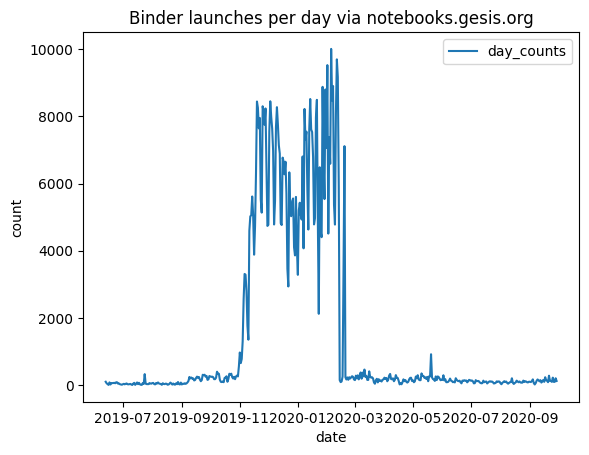